In [3]:
#!/usr/bin/env python
"""
Linear elasticity example using the imperative API.
"""
import sys
sys.argv = [arg for arg in sys.argv if not arg.startswith('--')]
from argparse import ArgumentParser
import numpy as nm

import sys
sys.path.append('.')

from sfepy.base.base import IndexedStruct
from sfepy.discrete import (FieldVariable, Material, Integral, Function,
                            Equation, Equations, Problem)
from sfepy.discrete.fem import Mesh, FEDomain, Field
from sfepy.terms import Term
from sfepy.discrete.conditions import Conditions, EssentialBC
from sfepy.solvers.ls import ScipyDirect
from sfepy.solvers.nls import Newton
from sfepy.mechanics.matcoefs import stiffness_from_lame


def shift_u_fun(ts, coors, bc=None, problem=None, shift=0.0):
    """
    Define a displacement depending on the y coordinate.
    """
    val = shift * coors[:,1]**2

    return val


def main():
    from sfepy import data_dir

    parser = ArgumentParser()
    parser.add_argument('--version', action='version', version='%(prog)s')
    options = parser.parse_args()

    mesh = Mesh.from_file(data_dir + '/meshes/2d/rectangle_tri.mesh')
    domain = FEDomain('domain', mesh)

    min_x, max_x = domain.get_mesh_bounding_box()[:,0]
    eps = 1e-8 * (max_x - min_x)
    omega = domain.create_region('Omega', 'all')
    gamma1 = domain.create_region('Gamma1',
                                  'vertices in x < %.10f' % (min_x + eps),
                                  'facet')
    gamma2 = domain.create_region('Gamma2',
                                  'vertices in x > %.10f' % (max_x - eps),
                                  'facet')

    field = Field.from_args('fu', nm.float64, 'vector', omega,
                            approx_order=2)

    u = FieldVariable('u', 'unknown', field)
    v = FieldVariable('v', 'test', field, primary_var_name='u')

    m = Material('m', D=stiffness_from_lame(dim=2, lam=1.0, mu=1.0))
    f = Material('f', val=[[0.02], [0.01]])

    integral = Integral('i', order=3)

    t1 = Term.new('dw_lin_elastic(m.D, v, u)',
                  integral, omega, m=m, v=v, u=u)
    t2 = Term.new('dw_volume_lvf(f.val, v)', integral, omega, f=f, v=v)
    eq = Equation('balance', t1 + t2)
    eqs = Equations([eq])

    fix_u = EssentialBC('fix_u', gamma1, {'u.all' : 0.0})

    bc_fun = Function('shift_u_fun', shift_u_fun,
                      extra_args={'shift' : 0.01})
    shift_u = EssentialBC('shift_u', gamma2, {'u.0' : bc_fun})

    ls = ScipyDirect({})

    nls_status = IndexedStruct()
    nls = Newton({}, lin_solver=ls, status=nls_status)

    pb = Problem('elasticity', equations=eqs)
    pb.save_regions_as_groups('regions')

    pb.set_bcs(ebcs=Conditions([fix_u, shift_u]))

    pb.set_solver(nls)

    status = IndexedStruct()
    variables = pb.solve(status=status)

    print('Nonlinear solver status:\n', nls_status)
    print('Stationary solver status:\n', status)

    pb.save_state('linear_elasticity.vtk', variables)


if __name__ == '__main__':
    main()

sfepy: reading mesh (C:\Users\yesda\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sfepy/meshes/2d/rectangle_tri.mesh)...
sfepy:   number of vertices: 258
sfepy:   number of cells:
sfepy:     2_3: 454
sfepy: ...done in 0.01 s
sfepy: saving regions as groups...
sfepy:   Omega
sfepy:   Gamma1
sfepy:   Gamma2
sfepy: ...done
sfepy: updating variables...
sfepy: ...done
sfepy: setting up dof connectivities...
sfepy: ...done in 0.00 s
sfepy: matrix shape: (1815, 1815)
sfepy: assembling matrix graph...
sfepy: ...done in 0.00 s
sfepy: matrix structural nonzeros: 39145 (1.19e+00% fill)
sfepy: updating variables...
sfepy: ...done
sfepy: updating materials...
sfepy:     f
sfepy:     m
sfepy: ...done in 0.01 s
sfepy: nls: iter: 0, residual: 1.343114e+01 (rel: 1.000000e+00)
sfepy:   residual:    0.04 [s]
sfepy:     matrix:    0.00 [s]
sfepy:      solve:    0.01 [s]
sfepy: nls: iter: 1, residual: 2.793967e-14 (rel: 2.080216e

Warning: VTK requires 3D vectors, but 2D vectors given. Appending 0 third component to u.

sfepy: solved in 1 steps in 0.10 seconds
Nonlinear solver status:
 IndexedStruct
  condition:
    0
  err:
    2.7939672244446236e-14
  err0:
    13.431138597204926
  ls_n_iter:
    -1
  n_iter:
    1
  time:
    0.05357479999656789
  time_stats:
    dict with keys: ['residual', 'matrix', 'solve']
Stationary solver status:
 IndexedStruct
  n_step:
    1
  time:
    0.10229700000490993


Warning: VTK requires 3D vectors, but 2D vectors given. Appending 0 third component to u.

sfepy: reading mesh (C:\Users\yesda\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sfepy/meshes/2d/square_unit_tri.mesh)...
sfepy:   number of vertices: 134
sfepy:   number of cells:
sfepy:     2_3: 226
sfepy: ...done in 0.00 s
Bounding Box of Mesh: [[-0.5 -0.5]
 [ 0.5  0.5]]
sfepy: updating variables...
sfepy: ...done
sfepy: setting up dof connectivities...
sfepy: ...done in 0.00 s
sfepy: matrix shape: (923, 923)
sfepy: assembling matrix graph...
sfepy: ...done in 0.00 s
sfepy: matrix structural nonzeros: 19609 (2.30e+00% fill)
sfepy: updating variables...
sfepy: ...done
sfepy: updating materials...
sfepy:     m
sfepy: ...done in 0.00 s
sfepy: nls: iter: 0, residual: 1.657642e+10 (rel: 1.000000e+00)
sfepy:   residual:    0.00 [s]
sfepy:     matrix:    0.00 [s]
sfepy:      solve:    0.00 [s]
sfepy: warning: linear system solution precision is lower then the value set in solver options! (err = 1.952650e-05 < 1.

Warning: VTK requires 3D vectors, but 2D vectors given. Appending 0 third component to u.

sfepy: solved in 1 steps in 0.08 seconds


Warning: VTK requires 3D vectors, but 2D vectors given. Appending 0 third component to u.

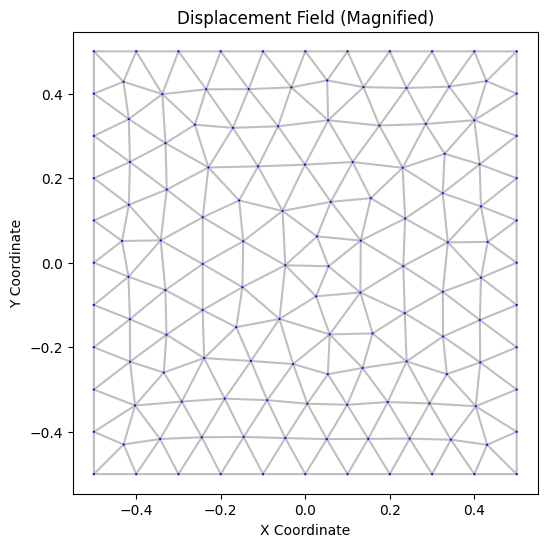

In [31]:
import numpy as np
from sfepy import data_dir
from sfepy.discrete.fem import Mesh, FEDomain, Field
from sfepy.terms import Term
from sfepy.base.base import IndexedStruct
from sfepy.discrete import (FieldVariable, Material, Integral, Function,
                            Equation, Equations, Problem)
from sfepy.discrete.conditions import Conditions, EssentialBC
from sfepy.mechanics.matcoefs import stiffness_from_youngpoisson
from sfepy.solvers.ls import ScipyDirect
from sfepy.solvers.nls import Newton
import matplotlib.pyplot as plt

# Create a 2D mesh
mesh_file = data_dir + '/meshes/2d/square_unit_tri.mesh'
mesh = Mesh.from_file(mesh_file)

# Define the finite element domain
domain = FEDomain('domain', mesh)
bounding_box = domain.mesh.get_bounding_box()
print("Bounding Box of Mesh:", bounding_box)

# Define regions
# Get bounding box dimensions
min_x, max_x = domain.get_mesh_bounding_box()[:, 0]
min_y, max_y = domain.get_mesh_bounding_box()[:, 1]
eps = 1e-8  # Small epsilon to avoid floating-point errors

# Define regions in terms of bounding box
omega = domain.create_region('Omega', 'all')  # Entire domain

gamma_left = domain.create_region(
    'Gamma_Left', 
    'vertices in x < %.10f' % (min_x + eps),
    'facet'
)

gamma_right = domain.create_region(
    'Gamma_Right', 
    'vertices in x > %.10f' % (max_x - eps),
    'facet'
)

gamma_bottom = domain.create_region(
    'Gamma_Bottom', 
    'vertices in y < %.10f' % (min_y + eps),
    'facet'
)

gamma_top = domain.create_region(
    'Gamma_Top', 
    'vertices in y > %.10f' % (max_y - eps),
    'facet'
)

gamma_center = domain.create_region(
    'Gamma_Center', 
    'vertices in x > %.10f' % (-0.01),
    'facet'
)


# Define a field for displacements
field = Field.from_args('displacement', np.float64, 'vector', omega, approx_order=2)


# Define material properties (Plane Stress)
young_modulus = 210e9  # Young's modulus in Pa
poisson_ratio = 0.3    # Poisson's ratio



# Define field variables
u = FieldVariable('u', 'unknown', field)
v = FieldVariable('v', 'test', field, primary_var_name='u')

# Define the linear elasticity term
integral = Integral('i', order=3)  # Quadrature order
# Define the linear elasticity term
m = Material('m', D = stiffness_from_youngpoisson(young=young_modulus, poisson=poisson_ratio, plane='stress', dim=2))  # Material with stiffness tensor D

# Define the term for linear elasticity
term = Term.new('dw_lin_elastic(m.D, v, u)', integral, omega, m=m, v=v, u=u)

# Define the equation
eq = Equation('balance', term)
eqs = Equations([eq])



# Define boundary conditions
fixed_bc = EssentialBC('fixed', gamma_left, {'u.all': 0.0})  # Fixed left edge
force_bc = EssentialBC('force', gamma_right, {'u.0': 0.01})  # Force applied at right edge

# Define the problem
pb = Problem('Linear Elasticity', equations=eqs)
pb.set_bcs(ebcs=Conditions([fixed_bc, force_bc]))

# Define the solvers
ls = ScipyDirect({})
nls = Newton({}, lin_solver=ls)

pb.set_solver(nls)

# Solve the problem
status = IndexedStruct()
variables = pb.solve(status=status)
pb.save_state('testing.vtk', variables)
# Extract the displacement for visualization
coors = pb.domain.mesh.coors
displacements = state.get_state_parts()['u']
# Ensure the displacement array matches the number of vertices
n_vertices = coors.shape[0]
displacements = displacements[:n_vertices * 2]  # Trim extra elements if needed
displacements_reshaped = displacements.reshape(n_vertices, 2)

# Separate X and Y components
disp_x = displacements_reshaped[:, 0]
disp_y = displacements_reshaped[:, 1]

# Plot the displacements
plt.figure(figsize=(6, 6))
plt.triplot(coors[:, 0], coors[:, 1], pb.domain.mesh.get_conn('2_3'), color='gray', alpha=0.5)
plt.quiver(coors[:, 0], coors[:, 1], disp_x, disp_y, angles='xy', scale_units='xy', scale=1e6, color='blue')
plt.title('Displacement Field (Magnified)')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.axis('equal')
plt.show()
